In [19]:
#Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from dotenv import load_dotenv
import os
import re

✅ Checklist Análise Exploratoria dos Dados (EDA)

1. **Visão Geral**

In [2]:
#Criando a conexao com a planilha do google
try:
    load_dotenv()  # Carrega as variáveis do .env
    sheet_id = os.getenv('SHEET_ID')
    sheet_name = os.getenv('SHEET_NAME')
    url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
    print('Conectado ao Google Sheets com sucesso.')
except Exception as e:
    print(f"Erro ao conectar com o Google Sheets: {e}")


Conectado ao Google Sheets com sucesso.


In [3]:
#Transformando os dados em um DataFrame
df_dados = pd.read_csv(url)

In [4]:
df_dados['Categorias'] = df_dados['Categorias'].str.strip().str.title()

In [5]:
df_dados.head().style.set_caption("Primeiras 5 linhas do dataset")

,Data,Categorias,Valor
0,01/01/25,Receita,"R$ 150,00"
1,02/01/25,Receita,"R$ 120,00"
2,02/01/25,Despesa Moto,"R$ 30,00"
3,02/01/25,Despesa Combustivel,"R$ 25,00"
4,02/01/25,Despesa Remedio,"R$ 65,00"


In [6]:
df_dados.sample(5).style.set_caption("5 linhas de amostras aleatorias do dataset")

,Data,Categorias,Valor
143,08/03/25,Despesa Moto,"R$ 30,00"
65,29/01/25,Despesa Casa,"R$ 140,00"
24,10/01/25,Despesa Combustivel,"R$ 20,00"
23,10/01/25,Receita,"R$ 110,00"
222,10/04/25,Agua,"R$ 84,00"


In [7]:
df_dados.tail().style.set_caption("Ultimas 5 linhas do dataset")

,Data,Categorias,Valor
283,11/05/25,Despesa Moto,"R$ 15,00"
284,12/05/25,Receita,"R$ 133,00"
285,12/05/25,Despesa Combustivel,"R$ 30,00"
286,13/05/25,Receita,"R$ 105,00"
287,13/05/25,Despesa Combustivel,"R$ 25,00"


In [8]:
f"O dataset possui {df_dados.shape[0]} linhas e {df_dados.shape[1]} colunas."

'O dataset possui 288 linhas e 3 colunas.'

In [9]:
for col in df_dados.columns:
    print(f"- {col}")

- Data
- Categorias
- Valor


In [10]:
df_dados.dtypes

Data          object
Categorias    object
Valor         object
dtype: object

In [11]:
print("Informações gerais do dataset:")
df_dados.info()

Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Data        288 non-null    object
 1   Categorias  288 non-null    object
 2   Valor       288 non-null    object
dtypes: object(3)
memory usage: 6.9+ KB


2. **Qualidade dos Dados**

In [30]:
#Funcao para formatar saida em percentual
def format_percent(value):
    return f'{100 * value:.2f}%'

#Verificando se a valores nulos no DataFrame
(df_dados.isna().sum() / len(df_dados)).sort_values(ascending=False).apply(format_percent).reset_index()

,index,0
0,Data,0.00%
1,Categorias,0.00%
2,Valor,0.00%


<function matplotlib.pyplot.show(close=None, block=None)>

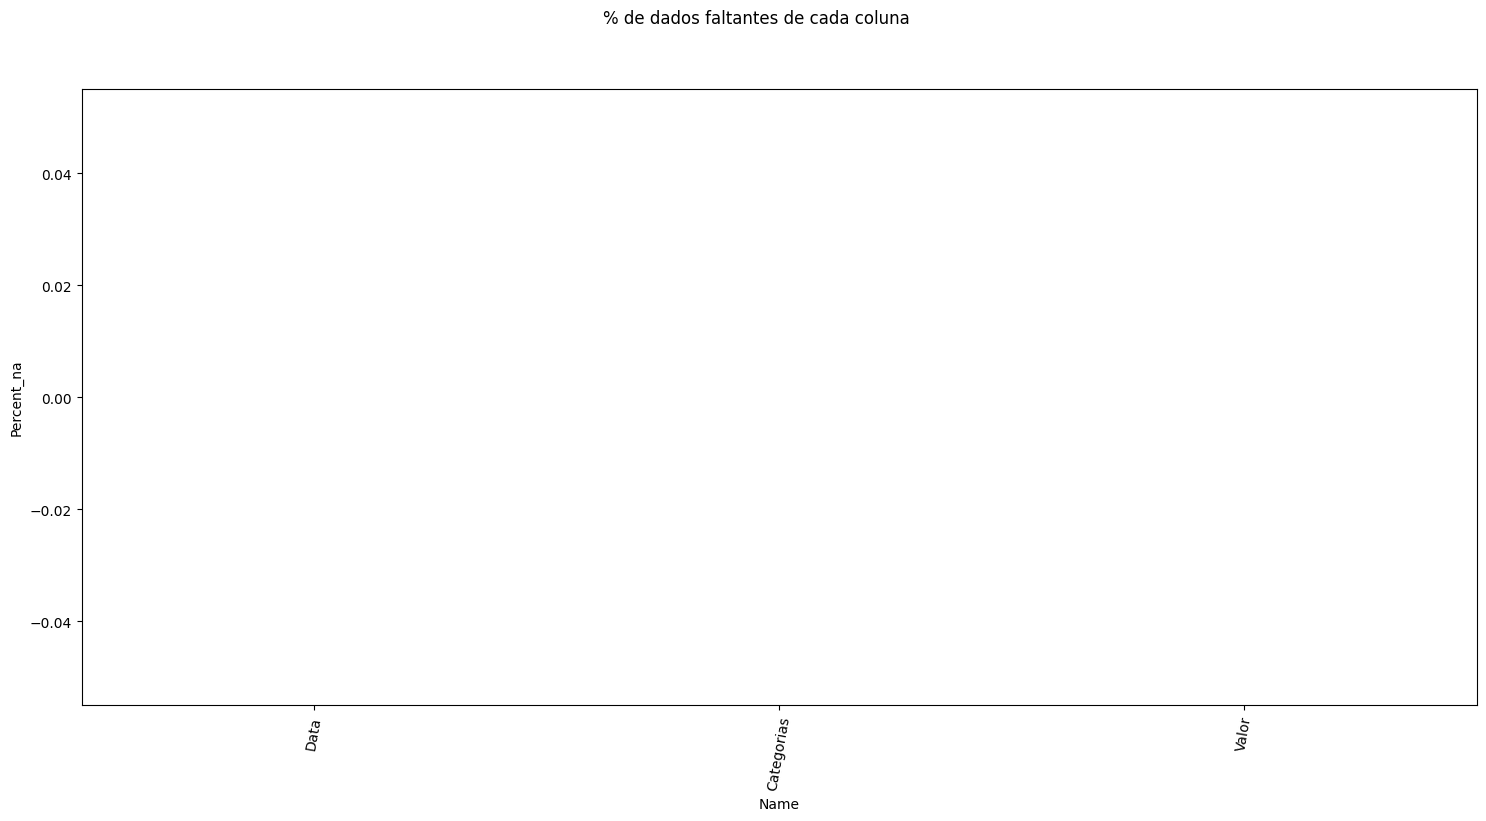

In [37]:
percent = (df_dados.isna().sum() / len(df_dados)).sort_values(ascending=False).reset_index()
percent_data = pd.DataFrame(percent)
percent_data.columns = ['Name', 'Percent_na']

fig, ax = plt.subplots(figsize=(18, 8))
sns.barplot(data=percent_data,
            x='Name',
            y='Percent_na')
fig.suptitle('% de dados faltantes de cada coluna')
plt.xticks(rotation=80)

plt.show

In [ ]:
# Verifica se a valores duplicados no DataFrame
df_dados.duplicated().sum()

np.int64(0)

In [ ]:
# Verificar se a valores unicos nas colunas do DataFrame
df_dados.nunique().to_frame('Valores_unicos').sort_values(by='Valores_unicos', ascending=False) 

,Valores_unicos
Data,114
Valor,42
Categorias,13


In [ ]:
df_dados.info()#Informaçoes dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Data        261 non-null    object
 1   Categorias  261 non-null    object
 2   Valor       261 non-null    object
dtypes: object(3)
memory usage: 6.2+ KB


In [ ]:
# Funcao para converter valores numericos para flutuante
def clean_currency(value):
    if pd.isna(value):# Se for NaN, retorna 0.0
        return 0.0
    if isinstance(value, str):# Remove "R$", espaços, pontos e mantém apenas números, "-" e ","
        value = re.sub(r'[^\d,.-]', '', value).replace(',', '.')
        return float(value)

# Aplica a função e converte a coluna para float    
df_dados['Valor'] = df_dados['Valor'].apply(clean_currency).astype(float)

In [ ]:
df_dados['Data'] = pd.to_datetime(df_dados['Data'], errors='coerce')

C:\Users\anton\AppData\Local\Temp\ipykernel_16124\3671601269.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_dados['Data'] = pd.to_datetime(df_dados['Data'], errors='coerce')


In [ ]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        261 non-null    datetime64[ns]
 1   Categorias  261 non-null    object        
 2   Valor       261 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 6.2+ KB


In [ ]:
# Verificando se a string vazias no DataFrame
for col in df_dados.columns:
    print(f'Coluna: {col}')
    print(df_dados[col].unique())
    print('-' * 30)

Coluna: Data
<DatetimeArray>
['2025-01-01 00:00:00', '2025-02-01 00:00:00', '2025-03-01 00:00:00',
 '2025-04-01 00:00:00', '2025-05-01 00:00:00', '2025-06-01 00:00:00',
 '2025-07-01 00:00:00', '2025-08-01 00:00:00', '2025-09-01 00:00:00',
 '2025-10-01 00:00:00',
 ...
 '2025-04-20 00:00:00', '2025-04-22 00:00:00', '2025-04-23 00:00:00',
 '2025-04-24 00:00:00', '2025-04-25 00:00:00', '2025-04-26 00:00:00',
 '2025-04-27 00:00:00', '2025-04-28 00:00:00', '2025-04-29 00:00:00',
 '2025-04-30 00:00:00']
Length: 114, dtype: datetime64[ns]
------------------------------
Coluna: Categorias
['Receita' 'Despesa Moto' 'Despesa Combustivel' 'Despesa Remedio'
 'Despesa Casa' 'Faculdade' 'Grafnet' 'Plano' 'Agua' 'Natacao' 'Claro'
 'Nubank' 'Luz']
------------------------------
Coluna: Valor
[150. 120.  30.  25.  65. 130. 100.  15. 125.  20. 245. 112. 200.  84.
 110.  60.  75.  10.  40. 105. 140. 257. 160. 170. 135.  80. 115.  45.
  50. 138. 287.  70. 165.  85. 229.  66. 145.  32.  90.  67. 275.  28.]
